# Pre-processing Overlay data for WaDE upload.
- Purpose: To preprocess state overlay data into one main file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/Texas/Overlays" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/Texas/Overlays


## Overlay Area Data #1

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/Groundwater_Conservation_Districts.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326) # Realign Geometry Projection

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "ov" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/Groundwater_Conservation_Districts.zip', compression=dict(method='zip', archive_name='Groundwater_Conservation_Districts.csv'), index=False)

print(len(dfin1))
dfin1.head()

101


,OBJECTID,SITETYPE,GWPACODE,CSTATUS,ORIGHIST,LEGSSION,ELECTION,ENABLACT,BNDTYPE,SHORTNAM,EST_DATE,ESTABNUM,TXT_4YR,BNDCHGDT,SHPEFORM,BNDYCOMM,DIST_NUM,BNDCHECK,CRREFNUM,ACREAGE,DISTNAME,CNTIESNUM,WSDQAQC,CNTYLINE,YR,DECADE,SQMILES,TCEQ_REGIS,ORIGIN_DES,ALPHAAUG20,GCD_HOME,WDDLINK,TRANS,SHAPEAREA,SHAPELEN,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,13761,GCD,700508,C,None,70,Required,HB 2587,Delimitation,Sterling County UWCD,1987-11-03,19,1987,2002-08-12,Compacted,Part of NW Tom Green Co. added.,7602000,OTLS,RN101397891,596568.41649,STERLING COUNTY UNDERGROUND WATER CONSERVATION...,2,mw,TxDOTUrban02,1987,1980,932.13815,http://www15.tceq.texas.gov/crpub/index.cfm?fu...,http://www.lrl.state.tx.us/LASDOCS/70R/HB2587/...,91,https://www.sterlinguwcd.org/,https://www14.tceq.texas.gov/iwud/dist/index.c...,,2414226727.66000,229951.75100,2.23659,0.23093,"POLYGON ((-100.92235 32.08648, -100.90847 32.0...",ov0
1,13762,GCD,710106,C,Antecedent,71,Required,SB 1635,Delimitation,Crockett County GCD,1991-01-26,27,1991,,Perforated,Excludes described land track in Ozona.,2875500,DRG,RN101249118,1788353.21037,CROCKETT COUNTY GROUNDWATER CONSERVATION DISTRICT,1,mw,TxDOTUrban02,1991,1990,2794.30189,http://www15.tceq.texas.gov/crpub/index.cfm?fu...,http://www.lrl.state.tx.us/scanned/sessionLaws...,21,https://www.crockettcountygcd.com,https://www14.tceq.texas.gov/iwud/dist/index.c...,,7237208674.92000,514574.43146,5.10845,0.68443,"POLYGON ((-101.77580 31.07963, -101.75110 31.0...",ov1
2,13763,GCD,690206,C,None,69,Required,SB 1870,Delimitation,Permian Basin UWCD,1985-09-21,12,1985,,Perforated,None,7102300,DOQQ 2004,RN101198943,1130139.72661,PERMIAN BASIN UNDERGROUND WATER CONSERVATION D...,2,mw,TxDOTUrban02,1985,1980,1765.84332,http://www15.tceq.texas.gov/crpub/index.cfm?fu...,http://www.lrl.state.tx.us/legis/billsearch/te...,69,https://www.pbuwcd.com/,https://www14.tceq.texas.gov/iwud/dist/index.c...,,4573513210.86000,406460.51396,4.08463,0.43965,"POLYGON ((-102.09259 32.52381, -102.06480 32.5...",ov2
3,13764,GCD,770209,C,None,77,Required,SB 1821,Delimitation,Neches & Trinity Valleys GCD,2001-11-06,55,2001,,Perforated,Anderson GCD was consolidated in 11/4/14,5949800,DRG,RN101260933,1968919.14364,NECHES & TRINITY VALLEYS GROUNDWATER CONSERVAT...,3,mw,TxDOTUrban02,2001,2000,3076.43616,http://www15.tceq.texas.gov/crpub/index.cfm?fu...,http://www.legis.state.tx.us/BillLookup/Text.a...,62,https://www.ntvgcd.org,https://www14.tceq.texas.gov/iwud/dist/index.c...,,7967933081.61000,657530.43031,6.56445,0.76310,"POLYGON ((-94.98542 32.13786, -94.98535 32.087...",ov3
4,13765,GCD,720204,C,None,72,Required,HB 0281,Delimitation,South Plains UWCD,1992-02-08,30,1992,,Shared,None,7583000,OTLS,RN101197358,578493.72270,SOUTH PLAINS UNDERGROUND WATER CONSERVATION DI...,2,mw,TxDOTUrban02,1992,1990,903.89644,http://www15.tceq.texas.gov/crpub/index.cfm?fu...,http://www.lrl.state.tx.us/LASDOCS/72R/HB281/H...,87,https://spuwcd.org/,https://www14.tceq.texas.gov/iwud/dist/index.c...,,2341081037.04000,197399.97275,1.94779,0.22702,"POLYGON ((-102.07546 33.26205, -102.07542 33.2...",ov4


In [4]:
# create output for Overlay Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = ""
df['in_Year'] = ""

# Organization Info
df['in_OrganizationUUID'] = "TXov_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = 4326
df['in_ReportingUnitName'] = dfin1["SHORTNAM"]
df['in_ReportingUnitNativeID'] = "tx" + dfin1["OBJECTID"].astype(int).astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Groundwater Conservation Districts"
df['in_ReportingUnitUpdateDate'] = "2/5/2022"
df['in_StateCV'] = "TX"
df['in_Geometry'] = dfin1['geometry']

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Texas Commission on Environmental Quality"
df['in_RegulatoryDescription'] = "A district created under Texas Constitution, Article III, Section 52 or Article XVI, Section 59 that has the authority to regulate the spacing of water wells, the production from water wells, or both."
df['in_RegulatoryName'] = dfin1["SHORTNAM"]
df['in_RegulatoryOverlayNativeID'] = dfin1["OBJECTID"]
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = dfin1["ENABLACT"]
df['in_RegulatoryStatuteLink'] =dfin1["ORIGIN_DES"]
df['in_StatutoryEffectiveDate'] = dfin1["EST_DATE"]
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Groundwater Conservation Districts"
df['in_WaterSourceTypeCV'] = "Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

101


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,ov0,,,TXov_O1,4326,Sterling County UWCD,tx13761,,Groundwater Conservation Districts,2/5/2022,TX,"POLYGON ((-100.92235 32.08648, -100.90847 32.0...",Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Sterling County UWCD,13761,Active,HB 2587,http://www.lrl.state.tx.us/LASDOCS/70R/HB2587/...,1987-11-03,,Groundwater Conservation Districts,Groundwater
1,ov1,,,TXov_O1,4326,Crockett County GCD,tx13762,,Groundwater Conservation Districts,2/5/2022,TX,"POLYGON ((-101.77580 31.07963, -101.75110 31.0...",Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Crockett County GCD,13762,Active,SB 1635,http://www.lrl.state.tx.us/scanned/sessionLaws...,1991-01-26,,Groundwater Conservation Districts,Groundwater
2,ov2,,,TXov_O1,4326,Permian Basin UWCD,tx13763,,Groundwater Conservation Districts,2/5/2022,TX,"POLYGON ((-102.09259 32.52381, -102.06480 32.5...",Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Permian Basin UWCD,13763,Active,SB 1870,http://www.lrl.state.tx.us/legis/billsearch/te...,1985-09-21,,Groundwater Conservation Districts,Groundwater
3,ov3,,,TXov_O1,4326,Neches & Trinity Valleys GCD,tx13764,,Groundwater Conservation Districts,2/5/2022,TX,"POLYGON ((-94.98542 32.13786, -94.98535 32.087...",Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Neches & Trinity Valleys GCD,13764,Active,SB 1821,http://www.legis.state.tx.us/BillLookup/Text.a...,2001-11-06,,Groundwater Conservation Districts,Groundwater
4,ov4,,,TXov_O1,4326,South Plains UWCD,tx13765,,Groundwater Conservation Districts,2/5/2022,TX,"POLYGON ((-102.07546 33.26205, -102.07542 33.2...",Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",South Plains UWCD,13765,Active,HB 0281,http://www.lrl.state.tx.us/LASDOCS/72R/HB281/H...,1992-02-08,,Groundwater Conservation Districts,Groundwater


## Overlay Area #2

In [5]:
# etc etc,

## Concatenate DataFrames together

In [6]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

101


## Clean Data / data types

In [7]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [8]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Sterling County UWCD', 'Crockett County GCD',
       'Permian Basin UWCD', 'Neches & Trinity Valleys GCD',
       'South Plains UWCD', 'Clearwater UWCD', 'Bee GCD',
       'Blanco-Pedernales GCD', 'Victoria County GCD', 'Red Sands GCD',
       'Northern Trinity GCD', 'Glasscock GCD', 'Santa Rita UWCD',
       'Pineywoods GCD', 'Post Oak Savannah GCD', 'Coke County UWCD',
       'Starr County GCD', 'Southeast Texas GCD',
       'San Patricio County GCD', 'Fort Bend Subsidence District',
       'Lost Pines GCD', 'Headwaters UWCD', 'Gateway GCD',
       'Hemphill County UWCD', 'Hill Country UWCD', 'Live Oak UWCD',
       'Llano Estacado UWCD', 'Lone Wolf GCD', 'McMullen GCD',
       'Mesa UWCD', 'Sandy Land UWCD', 'Saratoga UWCD',
       'Central Texas GCD', 'Uvalde County UWCD',
       'Real-Edwards C and R District', 'Brewster County GCD',
       'Fayette County GCD', 'Middle Pecos GCD', 'Texana GCD',
       'Refugio GCD', 'Goliad County GCD', 'Evergreen UWCD',
       'Brazos Va

In [9]:
outdf['in_RegulatoryDescription'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['A district created under Texas Constitution, Article III, Section 52 or Article XVI, Section 59 that has the authority to regulate the spacing of water wells, the production from water wells, or both.'],
      dtype=object)

In [10]:
outdf['in_RegulatoryName'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['Sterling County UWCD', 'Crockett County GCD',
       'Permian Basin UWCD', 'Neches & Trinity Valleys GCD',
       'South Plains UWCD', 'Clearwater UWCD', 'Bee GCD',
       'Blanco-Pedernales GCD', 'Victoria County GCD', 'Red Sands GCD',
       'Northern Trinity GCD', 'Glasscock GCD', 'Santa Rita UWCD',
       'Pineywoods GCD', 'Post Oak Savannah GCD', 'Coke County UWCD',
       'Starr County GCD', 'Southeast Texas GCD',
       'San Patricio County GCD', 'Fort Bend Subsidence District',
       'Lost Pines GCD', 'Headwaters UWCD', 'Gateway GCD',
       'Hemphill County UWCD', 'Hill Country UWCD', 'Live Oak UWCD',
       'Llano Estacado UWCD', 'Lone Wolf GCD', 'McMullen GCD',
       'Mesa UWCD', 'Sandy Land UWCD', 'Saratoga UWCD',
       'Central Texas GCD', 'Uvalde County UWCD',
       'Real-Edwards C and R District', 'Brewster County GCD',
       'Fayette County GCD', 'Middle Pecos GCD', 'Texana GCD',
       'Refugio GCD', 'Goliad County GCD', 'Evergreen UWCD',
       'Brazos Va

In [11]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

<DatetimeArray>
['1987-11-03 00:00:00', '1991-01-26 00:00:00', '1985-09-21 00:00:00',
 '2001-11-06 00:00:00', '1992-02-08 00:00:00', '1999-08-21 00:00:00',
 '2001-01-20 00:00:00', '2001-01-23 00:00:00', '2005-08-05 00:00:00',
 '2002-11-05 00:00:00', '2007-05-15 00:00:00', '1981-08-22 00:00:00',
 '1989-08-19 00:00:00', '1986-11-04 00:00:00', '2007-11-06 00:00:00',
 '2004-11-02 00:00:00', '2007-05-12 00:00:00', '1989-08-28 00:00:00',
 '1991-11-05 00:00:00', '2003-05-03 00:00:00', '1997-11-04 00:00:00',
 '1987-08-08 00:00:00', '1989-11-07 00:00:00', '1998-11-03 00:00:00',
 '2002-02-02 00:00:00', '1990-01-20 00:00:00', '2005-09-24 00:00:00',
 '1993-09-01 00:00:00', '1959-05-30 00:00:00', '1965-08-30 00:00:00',
 '2005-11-08 00:00:00', '1998-01-17 00:00:00', '2002-01-12 00:00:00',
 '1998-05-02 00:00:00', '1974-03-04 00:00:00', '1975-04-23 00:00:00',
 '1991-08-26 00:00:00', '1982-08-14 00:00:00', '1957-10-05 00:00:00',
 '1985-08-02 00:00:00', '1993-11-02 00:00:00', '1993-05-01 00:00:00',
 '20

# Geometry Data
- For attaching geometry to overlay reporting unit area info.

#### Overlay Area #1 shapefile info

In [12]:
# # Input File / or use same input as above

gdfin1 = outdf.copy()
gdfin1 = gpd.GeoDataFrame(gdfin1, geometry=gdfin1['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(gdfin1))
gdfin1.head()

101


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV,geometry
0,ov0,,,TXov_O1,4326,Sterling County UWCD,tx13761,,Groundwater Conservation Districts,2/5/2022,TX,"POLYGON ((-100.92235 32.08648, -100.90847 32.0...",Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Sterling County UWCD,13761,Active,HB 2587,http://www.lrl.state.tx.us/LASDOCS/70R/HB2587/...,1987-11-03,,Groundwater Conservation Districts,Groundwater,"POLYGON ((-100.92235 32.08648, -100.90847 32.0..."
1,ov1,,,TXov_O1,4326,Crockett County GCD,tx13762,,Groundwater Conservation Districts,2/5/2022,TX,"POLYGON ((-101.77580 31.07963, -101.75110 31.0...",Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Crockett County GCD,13762,Active,SB 1635,http://www.lrl.state.tx.us/scanned/sessionLaws...,1991-01-26,,Groundwater Conservation Districts,Groundwater,"POLYGON ((-101.77580 31.07963, -101.75110 31.0..."
2,ov2,,,TXov_O1,4326,Permian Basin UWCD,tx13763,,Groundwater Conservation Districts,2/5/2022,TX,"POLYGON ((-102.09259 32.52381, -102.06480 32.5...",Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Permian Basin UWCD,13763,Active,SB 1870,http://www.lrl.state.tx.us/legis/billsearch/te...,1985-09-21,,Groundwater Conservation Districts,Groundwater,"POLYGON ((-102.09259 32.52381, -102.06480 32.5..."
3,ov3,,,TXov_O1,4326,Neches & Trinity Valleys GCD,tx13764,,Groundwater Conservation Districts,2/5/2022,TX,"POLYGON ((-94.98542 32.13786, -94.98535 32.087...",Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Neches & Trinity Valleys GCD,13764,Active,SB 1821,http://www.legis.state.tx.us/BillLookup/Text.a...,2001-11-06,,Groundwater Conservation Districts,Groundwater,"POLYGON ((-94.98542 32.13786, -94.98535 32.087..."
4,ov4,,,TXov_O1,4326,South Plains UWCD,tx13765,,Groundwater Conservation Districts,2/5/2022,TX,"POLYGON ((-102.07546 33.26205, -102.07542 33.2...",Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",South Plains UWCD,13765,Active,HB 0281,http://www.lrl.state.tx.us/LASDOCS/72R/HB281/H...,1992-02-08,,Groundwater Conservation Districts,Groundwater,"POLYGON ((-102.07546 33.26205, -102.07542 33.2..."


<Axes: >

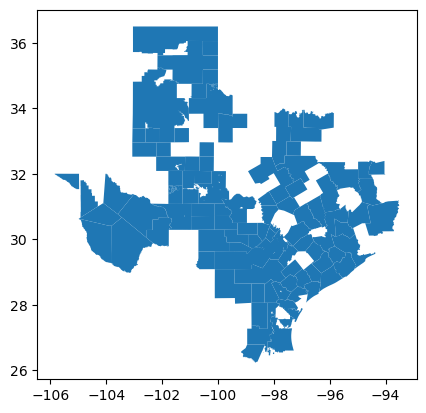

In [13]:
# plot shape info to map
gdfin1.plot()

In [14]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] =  gdfin1["in_ReportingUnitNativeID"].astype(str)  #in_ReportingUnitNativeID needs to match source from above equivalent dataframe
goutdf1['geometry'] = gdfin1['in_Geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)

# drop geometery from outdf
outdf = outdf.drop(['in_Geometry'], axis=1)


print(len(goutdf1))
goutdf1.head()

101


,in_ReportingUnitNativeID,geometry
0,tx13761,"POLYGON ((-100.92235 32.08648, -100.90847 32.0..."
1,tx13762,"POLYGON ((-101.77580 31.07963, -101.75110 31.0..."
2,tx13763,"POLYGON ((-102.09259 32.52381, -102.06480 32.5..."
3,tx13764,"POLYGON ((-94.98542 32.13786, -94.98535 32.087..."
4,tx13765,"POLYGON ((-102.07546 33.26205, -102.07542 33.2..."


#### Overlay Area #2 shapefile info

In [15]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [17]:
# Concatenate Geometry DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

101


,in_ReportingUnitNativeID,geometry
0,tx13761,"POLYGON ((-100.92235 32.08648, -100.90847 32.0..."
1,tx13762,"POLYGON ((-101.77580 31.07963, -101.75110 31.0..."
2,tx13763,"POLYGON ((-102.09259 32.52381, -102.06480 32.5..."
3,tx13764,"POLYGON ((-94.98542 32.13786, -94.98535 32.087..."
4,tx13765,"POLYGON ((-102.07546 33.26205, -102.07542 33.2..."


## Export Data

In [18]:
outdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   WaDEUUID                        101 non-null    object        
 1   in_Date                         101 non-null    object        
 2   in_Year                         101 non-null    object        
 3   in_OrganizationUUID             101 non-null    object        
 4   in_EPSGCodeCV                   101 non-null    int64         
 5   in_ReportingUnitName            101 non-null    object        
 6   in_ReportingUnitNativeID        101 non-null    object        
 7   in_ReportingUnitProductVersion  101 non-null    object        
 8   in_ReportingUnitTypeCV          101 non-null    object        
 9   in_ReportingUnitUpdateDate      101 non-null    object        
 10  in_StateCV                      101 non-null    object        
 11  in_Ove

In [19]:
outdf

,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,ov0,,,TXov_O1,4326,Sterling County UWCD,tx13761,,Groundwater Conservation Districts,2/5/2022,TX,Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Sterling County UWCD,13761,Active,HB 2587,http://www.lrl.state.tx.us/LASDOCS/70R/HB2587/...,1987-11-03,,Groundwater Conservation Districts,Groundwater
1,ov1,,,TXov_O1,4326,Crockett County GCD,tx13762,,Groundwater Conservation Districts,2/5/2022,TX,Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Crockett County GCD,13762,Active,SB 1635,http://www.lrl.state.tx.us/scanned/sessionLaws...,1991-01-26,,Groundwater Conservation Districts,Groundwater
2,ov2,,,TXov_O1,4326,Permian Basin UWCD,tx13763,,Groundwater Conservation Districts,2/5/2022,TX,Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Permian Basin UWCD,13763,Active,SB 1870,http://www.lrl.state.tx.us/legis/billsearch/te...,1985-09-21,,Groundwater Conservation Districts,Groundwater
3,ov3,,,TXov_O1,4326,Neches & Trinity Valleys GCD,tx13764,,Groundwater Conservation Districts,2/5/2022,TX,Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Neches & Trinity Valleys GCD,13764,Active,SB 1821,http://www.legis.state.tx.us/BillLookup/Text.a...,2001-11-06,,Groundwater Conservation Districts,Groundwater
4,ov4,,,TXov_O1,4326,South Plains UWCD,tx13765,,Groundwater Conservation Districts,2/5/2022,TX,Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",South Plains UWCD,13765,Active,HB 0281,http://www.lrl.state.tx.us/LASDOCS/72R/HB281/H...,1992-02-08,,Groundwater Conservation Districts,Groundwater
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,ov96,,,TXov_O1,4326,Kenedy County GCD,tx13857,,Groundwater Conservation Districts,2/5/2022,TX,Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Kenedy County GCD,13857,Active,HB 3374,http://www.legis.state.tx.us/BillLookup/Text.a...,2004-11-02,,Groundwater Conservation Districts,Groundwater
97,ov97,,,TXov_O1,4326,Brush Country GCD,tx13858,,Groundwater Conservation Districts,2/5/2022,TX,Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Brush Country GCD,13858,Active,SB 2456,http://www.capitol.state.tx.us/BillLookup/Text...,2009-11-03,,Groundwater Conservation Districts,Groundwater
98,ov98,,,TXov_O1,4326,North Texas GCD,tx13859,,Groundwater Conservation Districts,2/5/2022,TX,Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",North Texas GCD,13859,Active,SB 2497,http://www.legis.state.tx.us/tlodocs/81R/billt...,2009-12-01,,Groundwater Conservation Districts,Groundwater
99,ov99,,,TXov_O1,4326,Prairielands GCD,tx13860,,Groundwater Conservation Districts,2/5/2022,TX,Texas Commission on Environmental Quality,"A district created under Texas Constitution, A...",Prairielands GCD,13860,Active,SB 0726,http://www.legis.state.tx.us/tlodocs/81R/billt...,2009-09-01,,Groundwater Conservation Districts,Groundwater


In [20]:
goutdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   in_ReportingUnitNativeID  101 non-null    object  
 1   geometry                  101 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 1.7+ KB


In [21]:
goutdf

,in_ReportingUnitNativeID,geometry
0,tx13761,"POLYGON ((-100.92235 32.08648, -100.90847 32.0..."
1,tx13762,"POLYGON ((-101.77580 31.07963, -101.75110 31.0..."
2,tx13763,"POLYGON ((-102.09259 32.52381, -102.06480 32.5..."
3,tx13764,"POLYGON ((-94.98542 32.13786, -94.98535 32.087..."
4,tx13765,"POLYGON ((-102.07546 33.26205, -102.07542 33.2..."
...,...,...
96,tx13857,"MULTIPOLYGON (((-97.94335 27.65291, -97.94318 ..."
97,tx13858,"POLYGON ((-97.79852 27.99537, -97.79925 27.994..."
98,tx13859,"POLYGON ((-96.94351 33.94494, -96.94352 33.935..."
99,tx13860,"POLYGON ((-96.97370 31.77126, -97.00234 31.812..."


In [22]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pov_Main.zip', compression=dict(method='zip', archive_name='Pov_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.